In [1]:

#Autor: Leonan Teixeira
#Email: leonan.teixeira@gmail.com

#instala a biblioteca
#install.packages("FrF2")

#Carrega a biblioteca
require(FrF2)

#Applications Placement and Migration Based on Resource Demand and Network Traffic in a Fog

Loading required package: FrF2
Loading required package: DoE.base
Loading required package: grid
Loading required package: conf.design
Registered S3 method overwritten by 'DoE.base':
  method           from       
  factorize.factor conf.design

Attaching package: 'DoE.base'

The following objects are masked from 'package:stats':

    aov, lm

The following object is masked from 'package:graphics':

    plot.design

The following object is masked from 'package:base':

    lengths



In [2]:
experimento2k = FrF2(16,4, factor.names=rev(list(
    Recursos=c("100%","50%"),
    Carga=c("High","Low"),
    Topologia=c("A","D"),
    Algoritimo=c("DP-I","PLACERN")
)), random=F)

experimento2k

creating full factorial with 16 runs ...



Algoritimo,Topologia,Carga,Recursos
DP-I,A,High,100%
PLACERN,A,High,100%
DP-I,D,High,100%
PLACERN,D,High,100%
DP-I,A,Low,100%
PLACERN,A,Low,100%
DP-I,D,Low,100%
PLACERN,D,Low,100%
DP-I,A,High,50%
PLACERN,A,High,50%


In [3]:
Network<-c(361.00742795, 306.91913799, 216.10474091, 122.01475423,
       131.20024709,  49.74364827,  67.58545166,  47.1477146 ,
       434.28579452, 400.5490924 , 375.56532188, 309.65148688,
       272.42497174, 182.38876826, 159.874662  ,  87.36642032)

experimento2k = add.response(design=experimento2k, response=Network)
experimento2k

Algoritimo,Topologia,Carga,Recursos,Network
DP-I,A,High,100%,361.00743
PLACERN,A,High,100%,306.91914
DP-I,D,High,100%,216.10474
PLACERN,D,High,100%,122.01475
DP-I,A,Low,100%,131.20025
PLACERN,A,Low,100%,49.74365
DP-I,D,Low,100%,67.58545
PLACERN,D,Low,100%,47.14771
DP-I,A,High,50%,434.28579
PLACERN,A,High,50%,400.54909


In [4]:
DelayVRGame<-c(246.29810265, 163.43000788, 211.70529804, 184.60822422,
        25.93389099,  28.5177624 ,  39.26403926,  32.47529245,
       377.70772419, 293.86248835, 307.17391744, 229.67471219,
       100.35288405,  42.54628136,  61.18216296,  54.2348898)

DelayDCNS<-c(471.32445563, 476.82239299, 380.56935939, 247.77000056,
       183.88882398, 138.41485515,  73.40037502,  69.68855922,
       472.26969622, 465.3514268 , 486.50981583, 488.92028631,
       316.05499526, 337.00607716, 211.52281184, 191.45765307)

experimento2k = add.response(design=experimento2k, response=DelayVRGame)
experimento2k = add.response(design=experimento2k, response=DelayDCNS)
experimento2k

Algoritimo,Topologia,Carga,Recursos,Network,DelayVRGame,DelayDCNS
DP-I,A,High,100%,361.00743,246.29810,471.32446
PLACERN,A,High,100%,306.91914,163.43001,476.82239
DP-I,D,High,100%,216.10474,211.70530,380.56936
PLACERN,D,High,100%,122.01475,184.60822,247.77000
DP-I,A,Low,100%,131.20025,25.93389,183.88882
PLACERN,A,Low,100%,49.74365,28.51776,138.41486
DP-I,D,Low,100%,67.58545,39.26404,73.40038
PLACERN,D,Low,100%,47.14771,32.47529,69.68856
DP-I,A,High,50%,434.28579,377.70772,472.26970
PLACERN,A,High,50%,400.54909,293.86249,465.35143


In [5]:
recursos = experimento2k$Recursos
carga = experimento2k$Carga
topologia = experimento2k$Topologia
algoritimo = experimento2k$Algoritimo
fit<-aov(Network~recursos*carga*topologia*algoritimo,data=experimento2k)
efeitos<-coef(fit)[2:16]

In [16]:
s = 7
pdf(file = "charts\\net_normal.pdf", width = s,height = s)
DanielPlot(experimento2k, datax=T)
qqline(efeitos, col='Red')
dev.off()
#DanielPlot(experimento2k, datax=T, half=T)
#qqline(efeitos, col='Red')
pdf(file = "charts\\net_effect.pdf", width = s,height = s)
MEPlot(experimento2k)
dev.off()
pdf(file = "charts\\net_int.pdf", width = s,height = s)
IAPlot(experimento2k)
dev.off()

png 
  2

png 
  2

png 
  2

In [9]:
#VRGame

fit<-aov(DelayVRGame~recursos*carga*topologia*algoritimo,data=experimento2k)
efeitos<-coef(fit)[2:16]

pdf(file = "charts\\normal.pdf", width = 4,height = 4)
DanielPlot(experimento2k, datax=T, response="DelayVRGame")
qqline(efeitos, col='Red')
dev.off()
#DanielPlot(experimento2k, datax=T, half=T, response="DelayVRGame")
#qqline(efeitos, col='Red')
pdf(file = "charts\\delay_vr_effects.pdf", width = 4,height = 4)
MEPlot(experimento2k,response="DelayVRGame")
dev.off()
pdf(file = "charts\\delay_vr_inte.pdf", width = 4,height = 4)
IAPlot(experimento2k,response="DelayVRGame")
dev.off()

png 
  2

png 
  2

png 
  2

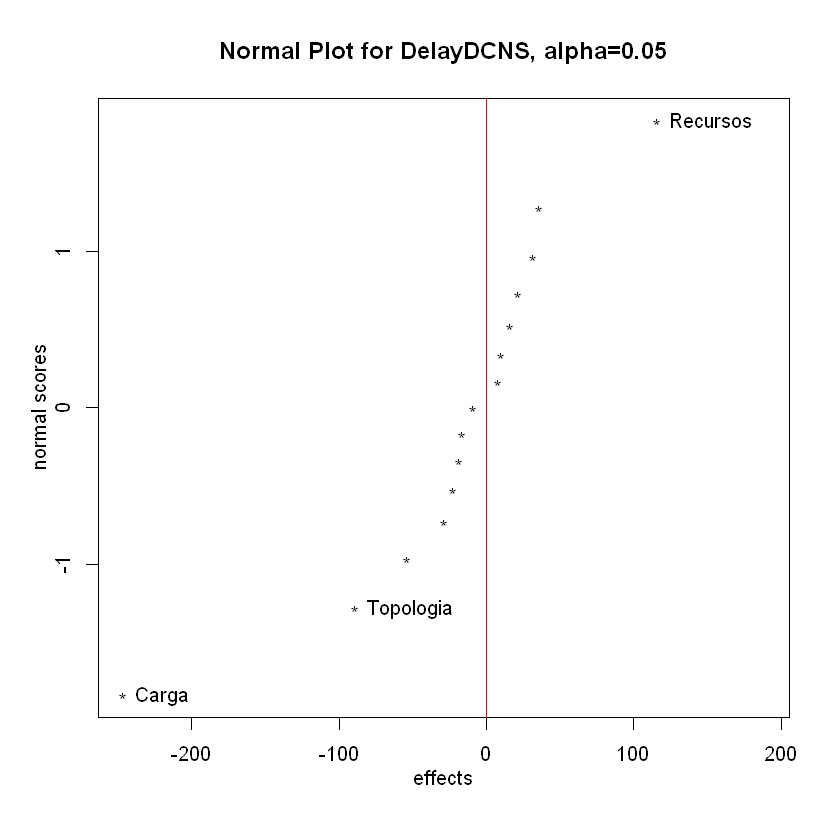

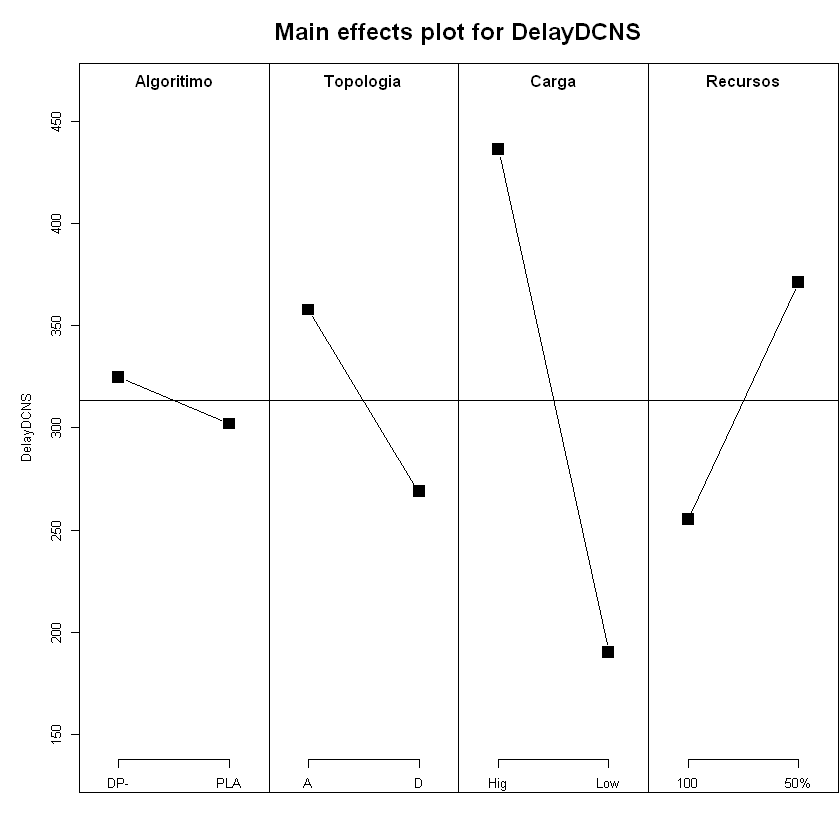

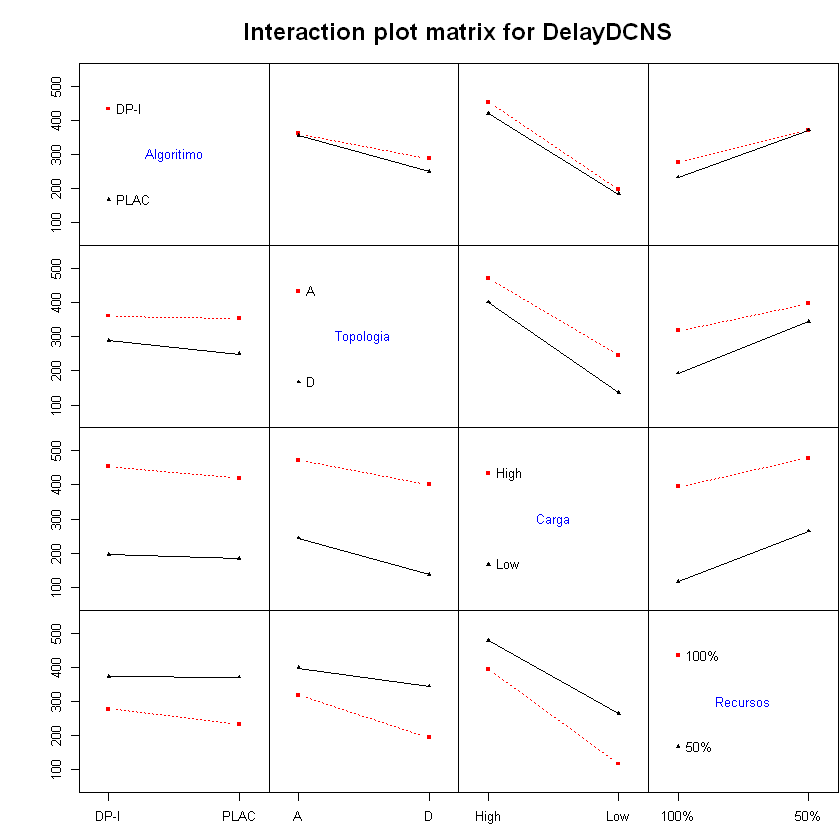

In [51]:
fit<-aov(DelayDCNS~recursos*carga*topologia*algoritimo,data=experimento2k)
efeitos<-coef(fit)[2:16]
DanielPlot(experimento2k, datax=T,response="DelayDCNS")
qqline(efeitos, col='Red')
#DanielPlot(experimento2k, datax=T, half=T,response="DelayDCNS")
#qqline(efeitos, col='Red')
MEPlot(experimento2k,response="DelayDCNS")
IAPlot(experimento2k,response="DelayDCNS")